In [1]:
# Import the libraries to use:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Cleaning and EDA</h1>

In this file will be carried out the data cleaning process and EDA (Exploratory Data Analysis).

In [2]:
# File upload:
df = pd.read_parquet(r"Dataset\Modified data\car_reviews.parquet")

In [3]:
df["Vehicle_Title"][0]

'2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)'

In [4]:
# Creating a copy of the column "Vehicle_Title"
df["Model_Name"]= df["Vehicle_Title"]

---
<h3>Attribute division</h3>

Brand of the car:

In [5]:
# Define a function to extract the second word and remove it from the Model_Name
def extract_brand_and_remove(text):
    words = text.split()  # Split the string into words
    if len(words) >= 2:   # Check if there are at least two words
        brand = words[1]  # Extract the second word as brand
        # Remove the brand from the title
        title = ' '.join(words[0:1] + words[2:])
        return brand, title
    else:
        return None, text  # Return None if there are fewer than two words

# Apply the function to the Vehicle_Title column and assign it to separate columns "Brand" and "Title"
df[["Brand", "Model_Name"]] = df["Model_Name"].apply(lambda x: pd.Series(extract_brand_and_remove(x)))

In [6]:
df["Brand"].unique()

array(['Dodge', 'Ferrari', 'FIAT', 'Ford', 'Genesis', 'HUMMER', 'Hyundai',
       'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini',
       'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce',
       'Subaru', 'Suzuki', 'Tesla', 'Volvo', 'Acura', 'Alfa', 'AM',
       'Aston', 'Audi', 'Bentley', 'BMW', 'GMC', 'Honda', 'Toyota',
       'Volkswagen', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler'], dtype=object)

In [7]:
df.head(3)

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Model_Name,Brand
0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625,2002 Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A),Dodge
1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125,2002 Ram Cargo Van 3500 3dr Ext Van (5.2L 8cyl...,Dodge
2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \rroom. ...",5,2002 Ram Cargo Van 3500 Maxi 3dr Ext Van (5.2L...,Dodge


In [8]:
# Complete brand names:
df["Brand"].replace("Land", "Land Rover", inplace=True)
df["Brand"].replace("Alfa", "Alfa Romeo", inplace=True)
df["Brand"].replace("AM", "AM General", inplace=True)
df["Brand"].replace("Aston", "Aston Martin", inplace=True)

In [9]:
df["Brand"].unique()

array(['Dodge', 'Ferrari', 'FIAT', 'Ford', 'Genesis', 'HUMMER', 'Hyundai',
       'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini',
       'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'Maserati', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce',
       'Subaru', 'Suzuki', 'Tesla', 'Volvo', 'Acura', 'Alfa Romeo',
       'AM General', 'Aston Martin', 'Audi', 'Bentley', 'BMW', 'GMC',
       'Honda', 'Toyota', 'Volkswagen', 'Bugatti', 'Buick', 'Cadillac',
       'Chevrolet', 'Chrysler'], dtype=object)

Year of the car:

In [10]:
# Define a function to extract the first word as the year and remove it from the Model_Name:
def extract_year_and_remove(text):
    words = text.split()  # Split the string into words
    if len(words) >= 1:   # Check if there is at least one word
        try:
            year = int(words[0])  # Extract the first word as year and convert to int
        except ValueError:
            year = None  # If the first word is not a valid integer, set year to None
        # Remove the year from the title:
        title = ' '.join(words[1:])
        return year, title
    else:
        return None, text  # Return None if there are no words

# Apply the function to the Model_Name column and assign it to separate columns "Model_Year" and "Model_Name":
df[["Model_Year", "Model_Name"]] = df["Model_Name"].apply(lambda x: pd.Series(extract_year_and_remove(x)))

In [11]:
df["Model_Year"].unique()

array([2002, 2001, 2003, 2006, 2007, 2005, 2008, 2004, 2009, 2000, 2014,
       2010, 2012, 1999, 1997, 1998, 2013, 2011, 2016, 2015, 2017, 2018,
       2019], dtype=int64)

Mecanic Details:

In [12]:
# Define a function to extract the content within the last parentheses and remove it from the Model_Name:
def extract_last_parentheses_and_remove(text):
    start_index = text.rfind("(")  # Find the index of the last '('
    end_index = text.rfind(")")    # Find the index of the last ')'
    if start_index != -1 and end_index != -1:  # Check if both '(' and ')' are found
        content_within_parentheses = text[start_index+1:end_index]  # Extract the content within parentheses
        # Remove the content within parentheses from the title:
        title = text[:start_index] + text[end_index+1:]
        return content_within_parentheses.strip(), title.strip()
    else:
        return None, text  # Return None if parentheses are not found

# Apply the function to the Model_Name column and assign it to separate columns "Content_In_Parentheses" and "Model_Name":
df[["Mecanic_Details", "Model_Name"]] = df["Model_Name"].apply(lambda x: pd.Series(extract_last_parentheses_and_remove(x)))

In [13]:
df["Mecanic_Details"].unique()

array(['3.9L 6cyl 3A', '5.2L 8cyl 4A', '5.7L 8cyl 5A', '3.5L 6cyl 5A',
       '2.7L 6cyl 4A', '6.1L 8cyl 5A', '3.5L 6cyl 4A',
       '2.7L 5cyl Turbodiesel 5A', '3.0L 6cyl Turbodiesel 5A', None,
       '2.4L 4cyl 4A', '3.6L 6cyl 6A', '2.4L 4cyl 6A', '3.5L 6cyl 6A',
       '2.4L 4cyl 6M', '2.0L 4cyl 6M', '1.4L 4cyl Turbo 6M',
       '2.0L 4cyl 4A', '2.0L 4cyl 5M', '2.4L 4cyl Turbo 5M',
       '3.3L 6cyl 4A', '2.4L 4cyl 3A', '8.4L 10cyl 6M', '3.0L 6cyl 4A',
       '2.4L 4cyl 5M', '3.0L 6cyl 5M', '2.7L 6cyl 5M', '5.7L 8cyl 6M',
       '5.7L 8cyl 5M', '5.9L 8cyl 5M', '8.3L 10cyl 6M', '8.0L 10cyl 6M',
       '4.7L 8cyl 6M', '4.7L 8cyl 5A', '3.7L 6cyl 6M', '8.3L 10cyl 4A',
       '4.7L 8cyl 5M', '3.7L 6cyl 5M', '3.7L 6cyl 4A', '5.2L 8cyl 5M',
       '3.9L 6cyl 5M', '2.5L 4cyl 5M', '5.9L 8cyl 4A',
       '5.9L 6cyl Turbodiesel 6M', '6.7L 6cyl Turbodiesel 6M',
       '5.9L 6cyl Turbodiesel 5M', '3.8L 6cyl 4A', '4.0L 6cyl 6A',
       '3.8L 6cyl 6A', '6.4L 8cyl 8A', '5.7L 8cyl 8A', '3.6L 6cyl 8A

Body Type and Doors:

In [14]:
# Define a list of keywords:
body_type_keywords = ['Van', 'Wagon', 'Coupe', 'Sedan', 'Minivan', 'Convertible', 'SUV', 'Hatchback', 'Roadster', 'Cabriolet']

# Define a function to extract the last word and check if it's in the list of keywords:
def extract_and_check_body_type(text):
    words = text.split()  # Split the string into words
    if len(words) >= 1:   # Check if there is at least one word
        last_word = words[-1]  # Extract the last word
        if last_word in body_type_keywords:  # Check if the last word is in the list of keywords
            # Remove the last word from the title:
            title = ' '.join(words[:-1])
            return last_word, title
    return None, text  # Return None if the last word is not in the list of keywords

# Apply the function to the Model_Name column and assign it to separate columns "Body_Type" and "Model_Name":
df[["Body_Type", "Model_Name"]] = df["Model_Name"].apply(lambda x: pd.Series(extract_and_check_body_type(x)))

In [15]:
df["Body_Type"].unique()

array(['Van', 'Wagon', None, 'Coupe', 'Sedan', 'Minivan', 'Convertible',
       'SUV', 'Hatchback', 'Roadster', 'Cabriolet'], dtype=object)

In [16]:
# Define a function to update the Body_Type column:
def update_body_type(row):
    if any(dr in row['Model_Name'] for dr in ['2dr', '3dr', '4dr']):
        if row['Body_Type'] is not None:  # Check if Body_Type is not None
            body_type = row['Body_Type'] + ' ' + ' '.join(dr for dr in ['2dr', '3dr', '4dr'] if dr in row['Model_Name'])
        else:
            body_type = ' '.join(dr for dr in ['2dr', '3dr', '4dr'] if dr in row['Model_Name'])
        return body_type.strip()
    else:
        return row['Body_Type']

# Apply the function to update the Body_Type column:
df['Body_Type'] = df.apply(update_body_type, axis=1)

In [17]:
# Define a regular expression pattern to remove "2dr", "3dr" or "4dr" from Model_Name:
pattern = r'\b(2|3|4)dr\b'

# Define a function to remove "2dr", "3dr" or "4dr" from Model_Name:
def remove_dr(text):
    return re.sub(pattern, '', text)

# Apply the function to remove "2dr", "3dr" or "4dr" from Model_Name:
df['Model_Name'] = df['Model_Name'].apply(remove_dr)

In [18]:
df[["Model_Name", "Body_Type"]]

,Model_Name,Body_Type
0,Ram Cargo Van 1500,Van 3dr
1,Ram Cargo Van 3500 Ext,Van 3dr
2,Ram Cargo Van 3500 Maxi Ext,Van 3dr
3,Ram Cargo Van 2500 Maxi Ext,Van 3dr
4,Ram Cargo Van 1500,Van 3dr
...,...,...
226807,300M Sedan,Sedan 4dr
226808,300M Sedan,Sedan 4dr
226809,300M Sedan Special,Sedan 4dr
226810,300M Sedan Special,Sedan 4dr


Review Date:

In [19]:
# Define a function to extract the date
def extract_date(text):
    # Use regular expression to find the date pattern
    match = re.search(r'\b(\d{1,2}/\d{1,2}/\d{2})', text)
    if match:
        # Convert the matched date to datetime
        return pd.to_datetime(match.group(1), format='%m/%d/%y')
    else:
        return None  # Return None if date pattern is not found

# Apply the function to extract date to the Review_Date column
df['Review_Date'] = df['Review_Date'].apply(extract_date)

In [20]:
df["Review_Date"]

0        2005-10-13
1        2005-07-17
2        2002-07-16
3        2007-12-29
4        2005-02-09
            ...    
226807   2002-12-04
226808   2002-11-25
226809   2002-11-20
226810   2002-10-03
226811   2002-09-21
Name: Review_Date, Length: 226763, dtype: datetime64[ns]

Last transformations to the DataFrame:

In [21]:
# Rename columns:
df["Author"] = df["Author_Name"]
df["Full_Description"] = df["Vehicle_Title"]

In [22]:
# Change types of the column "Rating"
df["Rating"] = df["Rating"].astype(float)

In [23]:
# Deleting innecesary spaces in the strings of "Model_Name":
df["Model_Name"] = df["Model_Name"].str.strip()

In [24]:
# Reset point:
clean_df = df[["Review_Date", "Author", "Brand", "Model_Name", "Model_Year", "Mecanic_Details", "Body_Type", "Full_Description", "Rating", "Review_Title", "Review"]]
clean_df.head(3)

,Review_Date,Author,Brand,Model_Name,Model_Year,Mecanic_Details,Body_Type,Full_Description,Rating,Review_Title,Review
0,2005-10-13,roadking,Dodge,Ram Cargo Van 1500,2002,3.9L 6cyl 3A,Van 3dr,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,4.625,Great delivery vehicle,It's been a great delivery vehicle for my caf...
1,2005-07-17,Mark,Dodge,Ram Cargo Van 3500 Ext,2002,5.2L 8cyl 4A,Van 3dr,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,2.125,Disappointmnet,Bought this car as a commuter vehicle for a v...
2,2002-07-16,Tom Sheer,Dodge,Ram Cargo Van 3500 Maxi Ext,2002,5.2L 8cyl 4A,Van 3dr,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,5.000,Sweet van,"This van rocks its the best, lots of \rroom. ..."


Saving as PARQUET:

In [25]:
clean_df.to_parquet(r'Dataset\Modified data\cleaned_car_reviews.parquet')

---
<h3>EDA</h3>

**Quick info about the DataFrame:**

In [25]:
# Check the length of the DataFrame:
len(clean_df)

226763

In [61]:
clean_df.describe()

,Review_Date,Model_Year,Rating
count,226763,226763.000000,226763.000000
mean,2009-06-25 03:17:12.025506816,2006.100444,4.286387
min,2002-01-30 00:00:00,1997.000000,1.000000
25%,2005-06-29 00:00:00,2002.000000,4.000000
50%,2008-11-24 00:00:00,2005.000000,4.625000
75%,2012-12-08 00:00:00,2009.000000,5.000000
max,2018-09-19 00:00:00,2019.000000,5.000000
std,NaN,5.295089,0.922212


There are 226763 reviews. The first one was on January 30th, 2002, and the last one was on September 19th, 2018.

**Variables description:**

In [64]:
# Check columns:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226763 entries, 0 to 226811
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Review_Date       226763 non-null  datetime64[ns]
 1   Author            226763 non-null  object        
 2   Brand             226763 non-null  object        
 3   Model_Name        226763 non-null  object        
 4   Model_Year        226763 non-null  int64         
 5   Mecanic_Details   193769 non-null  object        
 6   Body_Type         226750 non-null  object        
 7   Full_Description  226763 non-null  object        
 8   Rating            226763 non-null  float64       
 9   Review_Title      226763 non-null  object        
 10  Review            226763 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 28.8+ MB


Qualitative (categorical):

- Author: Contains names of authors. It is a nominal categorical variable.

- Brand: Represents different car brands. It is a nominal categorical variable.

- Model_Name: Contains car model names. It is a nominal categorical variable.

- Mecanic_Details: Contains information about the engine's displacement, its number of cylinders, and its transmission (automatic or manual, number of speeds). It also indicates whether it is a hybrid or electric car. It is a nominal categorical variable.

- Body_Type: Contains the car body types, such as sedan, SUV, hatchback, etc., and the number of doors. It is a nominal categorical variable.

- Full_Description: It is a complete description of the car, including year, make, model name, body type and mechanical details. It is a nominal categorical variable.

- Review_Title: Contains review titles, which are categories. It is a nominal categorical variable.

- Review: Contains the main text of the reviews. It is a nominal categorical variable.

- Model_Year: Indicates the year of the car model. It is a nominal qualitative variable.

Quantitative (numeric):

- Review_Date: Represents the date of the reviews in year/month/day format. It is a quantitative variable.

- Rating: Represents the rating of the reviews between the values 1 (bad) and 5 (good). It is a continuous quantitative variable.

**Check missing or null values:**

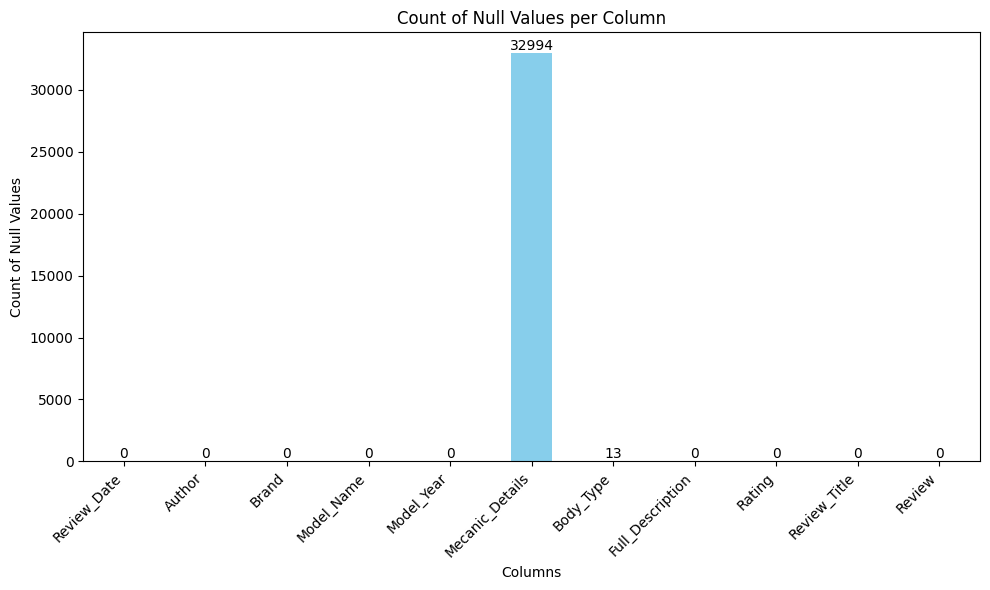

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose you already have a DataFrame named 'df'

# Calculate the count of null values in each column
null_counts = clean_df.isnull().sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')

# Add labels to the chart
for index, value in enumerate(null_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Title and labels configuration
plt.title('Count of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

There are 32994 missing or null values on the "Mecanic_Details" column and 13 on "Body_Type". The fact that there are nulls in those columns does not represent a loss of information in our processes.

**Analyzing car brands:**

In [28]:
# Amount of car brands on the dataset:
len(clean_df["Brand"].unique())

50

In [29]:
# Amount of reviews for each brand cars:
brand_by_reviews = clean_df["Brand"].value_counts()
brand_by_reviews

Brand
Ford             20700
Chevrolet        19428
Toyota           18733
Honda            12677
Nissan           11837
Volkswagen        9379
Dodge             8490
Hyundai           8218
BMW               8056
Mazda             7859
Mercedes-Benz     7368
Subaru            6560
Acura             6557
Lexus             6150
Audi              6041
Kia               5985
Pontiac           5938
Chrysler          5560
GMC               4985
Jeep              4959
Volvo             4841
Mitsubishi        4787
INFINITI          4305
Cadillac          3924
Buick             3643
Mercury           3358
Lincoln           3034
Suzuki            2931
Jaguar            1883
Land Rover        1832
Porsche           1782
Isuzu             1180
MINI              1038
Ram                566
HUMMER             559
FIAT               395
Maserati           238
Ferrari            161
Bentley            150
Tesla              137
Lotus              136
Aston Martin        90
Lamborghini         86
Alfa 

We have 50 different car brands. The most reviewed is Ford with 20700 reviews, and the least reviewed is McLaren with only 1 review.

In [30]:
# Average rating for each brand:
brand_by_rating = clean_df.groupby('Brand')['Rating'].mean().sort_values(ascending=False)
brand_by_rating

Brand
McLaren          5.000000
Ferrari          4.721273
Maybach          4.656250
Lotus            4.655331
Porsche          4.652848
Lamborghini      4.646802
Lexus            4.571037
Bugatti          4.555556
Aston Martin     4.552778
Genesis          4.545455
Jaguar           4.530736
HUMMER           4.504919
Acura            4.501925
INFINITI         4.485134
BMW              4.478556
Audi             4.467741
Mitsubishi       4.451614
Maserati         4.448529
Rolls-Royce      4.444853
Lincoln          4.436305
Mercedes-Benz    4.411764
Toyota           4.404507
Mazda            4.401276
Tesla            4.392336
Alfa Romeo       4.376623
Bentley          4.374167
Mercury          4.373437
Cadillac         4.306925
Volvo            4.305051
Pontiac          4.299070
Honda            4.294549
MINI             4.293593
Hyundai          4.250532
Subaru           4.247104
Buick            4.241319
Volkswagen       4.206778
Isuzu            4.198093
Suzuki           4.192639
Dodge 

The brand with the best average rating is McLaren with 5.0 (not valid because it only has one review) followed by Ferrari with 4.72 and Maybach with 4.66 (rounded). The brands with the lowest average score are FIAT, Land Rover, Jeep and Ram, with less than 4 points.

In [31]:
# Amount of car models reviewed, per brand:
brand_by_models = clean_df.groupby('Brand')['Full_Description'].nunique().sort_values(ascending=False)
brand_by_models

Brand
Ford             3258
Chevrolet        2760
Toyota           2328
Nissan           1735
Honda            1704
Volkswagen       1577
GMC              1261
Dodge            1171
Subaru            969
Hyundai           943
Mazda             938
BMW               829
Mercedes-Benz     804
Audi              753
Kia               705
Jeep              643
Mitsubishi        601
Chrysler          495
Acura             494
Suzuki            460
Cadillac          457
Volvo             452
Buick             374
INFINITI          370
Lexus             370
Pontiac           345
Lincoln           308
Mercury           291
Ram               281
Porsche           280
Jaguar            254
Land Rover        186
Isuzu             175
MINI              127
FIAT               68
Maserati           61
Ferrari            47
Bentley            39
Tesla              36
HUMMER             35
Aston Martin       31
Lamborghini        24
Alfa Romeo         22
Genesis            16
Lotus              16
Roll

The brands with the most car models analyzed are Ford (3258 models), Chevrolet (2760 models) and Toyota (2328 models). The brands with the fewest car models reviewed are McLaren (1 model), AM General (2 models) and Bugatti (4 models). We include the year of each car as a distinctive feature between the models.

In [37]:
# 
brand_merge = pd.merge(brand_by_reviews, brand_by_rating, on="Brand")
brand_merge[["Reviews", "Rating", "Models"]] = pd.merge(brand_merge, brand_by_models, on="Brand")
brand_merge.drop(columns=["count"], inplace=True)
brand_merge.head()

,Rating,Reviews,Models
Brand,,,
Ford,4.164589,20700,3258
Chevrolet,4.141265,19428,2760
Toyota,4.404507,18733,2328
Honda,4.294549,12677,1704
Nissan,4.187273,11837,1735


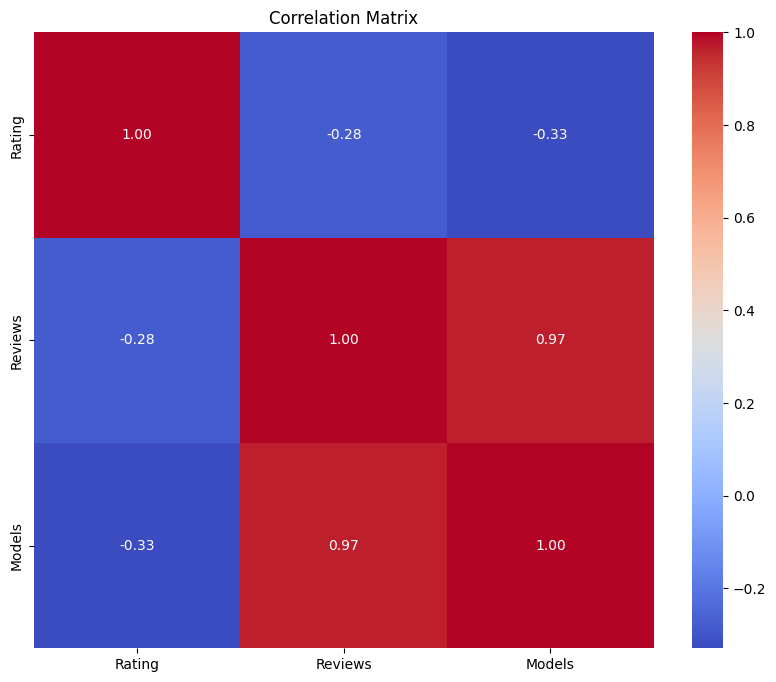

In [41]:
# Creating a correlation matrix:
correlation_matrix = brand_merge.corr()

# Plotting the correlation matrix using a Seaborn heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We can see a high correlation between the amount of models reviewed and the number of reviews.

**Analyzing car models:**

In [53]:
# Amount of car models on the dataset:
len(clean_df["Full_Description"].unique())

29121

In [54]:
# Amount of reviews for each brand cars:
cars_by_reviews_fd = clean_df["Full_Description"].value_counts()
cars_by_reviews_fd

Full_Description
2003 Acura RSX Type-S Type-S 2dr Hatchback (2.0L 4cyl 6M)                        95
2002 Acura RSX Type-S Type-S 2dr Hatchback (2.0L 4cyl 6M)                        95
2004 Acura RSX Type-S Type-S 2dr Hatchback (2.0L 4cyl 6M)                        95
2005 Acura RL Sedan 3.5 4dr Sedan (3.5L 6cyl 5A)                                 95
2001 Acura CL 3.2 Type-S 3.2 Type-S 2dr Coupe (3.2L 6cyl 5A)                     93
                                                                                 ..
1997 Ford F-150 Extended Cab XL 3dr Extended Cab LB                               1
1997 Ford F-150 Regular Cab XL 2dr Regular Cab 4WD LB                             1
2016 BMW 3 Series Sedan 328i SULEV 4dr Sedan (2.0L 4cyl Turbo 8A)                 1
2016 BMW 3 Series Diesel 328d xDrive 4dr Wagon AWD (2.0L 4cyl Turbodiesel 8A)     1
2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)                              1
Name: count, Length: 29121, dtype: int64

We have 29121 different car models, including the year of each car as a distinctive feature between the models. The most reviewed are the "Acura RSX Type-S Type-S 2dr Hatchback (2.0L 4cyl 6M)" from 2002, 2003 and 2004, and the "Acura RL Sedan 3.5 4dr Sedan (3.5L 6cyl 5A)" from 2005, with 95 reviews each.

In [57]:
# Amount of car models on the dataset:
len(clean_df["Model_Name"].unique())

10340

In [58]:
# Amount of reviews for each brand cars:
cars_by_reviews_mn = clean_df["Model_Name"].value_counts()
cars_by_reviews_mn

Model_Name
Elantra Sedan GLS                                              698
Camry Sedan LE                                                 655
TL Sedan 3.2                                                   591
Civic Sedan LX                                                 564
Corvette Coupe                                                 550
                                                              ... 
Sierra 2500HD Regular Cab SL1  Regular Cab 4WD LB                1
Sierra 2500HD Regular Cab SLE1  Regular Cab 4WD LB               1
F-150 Regular Cab  Regular Cab XLT 4WD Flareside 6.5 ft. SB      1
Sierra 2500HD Crew Cab SL1  Crew Cab 4WD SB                      1
Titan Crew Cab  Crew Cab XE FFV Rwd SB                           1
Name: count, Length: 10340, dtype: int64

If we only take in consideration the name of the model, we have 10340 different car models. The most reviewed is the "Elantra Sedan GLS" with 698 reviews, followed by the "Camry Sedan LE" with 655 reviews.

**Time analysis:**

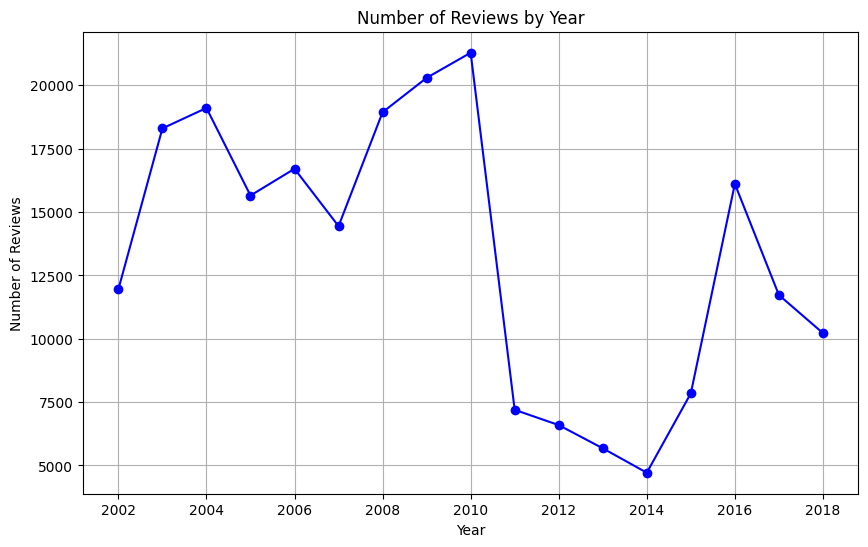

In [65]:
# Counting the number of reviews for each year:
reviews_by_year = clean_df['Review_Date'].dt.year.value_counts().sort_index()

# Plotting the time series:
plt.figure(figsize=(10, 6))
reviews_by_year.plot(kind='line', marker='o', color='b')
plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

We can see a drastical drop of the number of reviews on 2010 to 2011, wich then continued dropping until 2014.

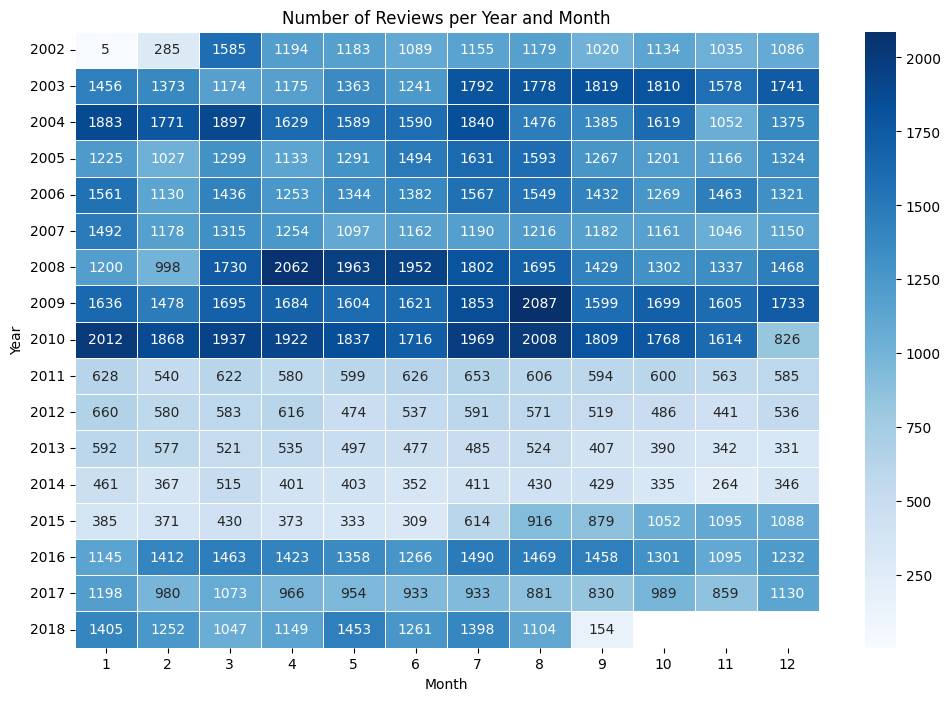

In [69]:
# Extracting year and month from 'Review_Date':
clean_df['Year'] = clean_df['Review_Date'].dt.year
clean_df['Month'] = clean_df['Review_Date'].dt.month

# Counting the number of reviews per year and month:
reviews_by_month = clean_df.groupby(['Year', 'Month']).size().unstack()

# Creating the heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(reviews_by_month, cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.yticks(rotation=0)
plt.title('Number of Reviews per Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**Analyzing electric and hybrid vehicles:**

In [97]:
# Filter the DataFrame to show registers containing "electric" or "EV" but not containing "gas" or "hybrid" in "Mecanic_Details":
electric_reviews = clean_df[clean_df['Mecanic_Details'].str.contains('electric|EV', case=False, na=False) & ~clean_df['Mecanic_Details'].str.contains('gas|hybrid', case=False, na=False)]
len(electric_reviews)

517

In [98]:
# Filter the DataFrame to show registers containing "hybrid" in "Mecanic_Details"
hybrid_reviews = clean_df[clean_df['Mecanic_Details'].str.contains('hybrid', case=False, na=False)]
len(hybrid_reviews)

6098

There are 6098 reviews of hybrid vehicles, and 517 reviews of fully electric vehicles.

In [104]:
# Numbers of reviews for each EV:
electric_reviews["Full_Description"].value_counts().head()

Full_Description
2017 Chevrolet Bolt EV Hatchback Premier 4dr Hatchback (electric DD)    39
2017 Tesla Model 3 Sedan Long Range 4dr Sedan (electric 1DD)            19
2011 Nissan Leaf Hatchback SL 4dr Hatchback (electric 1DD)              16
2017 Chevrolet Bolt EV Hatchback LT 4dr Hatchback (electric DD)         16
2012 Nissan Leaf Hatchback SL 4dr Hatchback (electric DD)               16
Name: count, dtype: int64

The most reviewed EV is the "Chevrolet Bolt EV Hatchback", followed by the "Tesla Model 3" and the "Nissan Leaf Hatchback".

In [105]:
# Numbers of reviews for each hybrid vehicles:
hybrid_reviews["Full_Description"].value_counts().head(10)

Full_Description
2008 Toyota Camry Hybrid Sedan 4dr Sedan (2.4L 4cyl gas/electric hybrid CVT)     70
2006 Toyota Prius Hatchback 4dr Hatchback (1.5L 4cyl gas/electric hybrid CVT)    70
2010 Ford Fusion Hybrid Sedan 4dr Sedan (2.5L 4cyl gas/electric hybrid CVT)      70
2003 Toyota Prius Sedan 4dr Sedan (1.5L 4cyl gas/electric hybrid CVT)            70
2005 Toyota Prius Hatchback 4dr Hatchback (1.5L 4cyl gas/electric hybrid CVT)    70
2002 Toyota Prius Sedan 4dr Sedan (1.5L 4cyl gas/electric hybrid CVT)            70
2012 Chevrolet Volt Hatchback 4dr Hatchback (gas/electric hybrid DD)             70
2009 Toyota Camry Hybrid Sedan 4dr Sedan (2.4L 4cyl gas/electric hybrid CVT)     70
2007 Toyota Camry Hybrid Sedan 4dr Sedan (2.4L 4cyl gas/electric hybrid CVT)     70
2013 Chevrolet Volt Hatchback 4dr Hatchback (gas/electric hybrid DD)             67
Name: count, dtype: int64

The most reviewed hybrid vehicles are "Toyota Camry Hybrid", "Toyota Prius" sedan or hatchback, "Ford Fusion Hybrid" and "Chevrolet Bolt Hatchback"

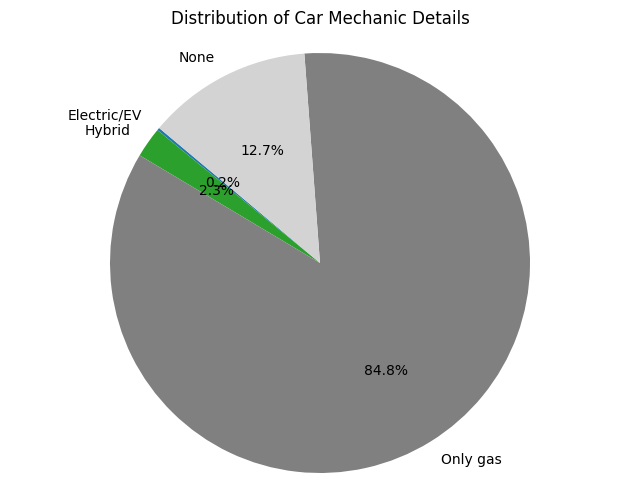

In [115]:
# Filter records for each group
electric_ev_not_gas_hybrid = clean_df[clean_df['Mecanic_Details'].str.contains('electric|EV', case=False, na=False) & ~clean_df['Mecanic_Details'].str.contains('gas|hybrid', case=False, na=False)]
hybrid = clean_df[clean_df['Mecanic_Details'].str.contains('hybrid', case=False, na=False)]
only_gas = clean_df[~clean_df['Mecanic_Details'].str.contains('electric|EV|hybrid', case=False, na=False)]
none_records = clean_df[clean_df['Mecanic_Details'].isna()]

# Count the number of records for each group:
counts = [
    len(electric_ev_not_gas_hybrid),
    len(hybrid),
    len(only_gas),
    len(none_records)
]

# Labels for the pie chart:
labels = ['Electric/EV', 'Hybrid', 'Only gas', 'None']

# Colors for the pie chart:
colors = ['#1f77b4', '#2ca02c', '#808080', '#d3d3d3']

# Create the pie chart:
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Car Mechanic Details')
plt.axis('equal')
plt.show()

As we can see, a 0.2% of the reviews is about EVs, a 2.3% is for hybrid vehicles, a 84.8% is for gas (not hybrid) vehicles, and a 12.7% is not specified.